# HH fitting Kv1.4 recordings

In [1]:
%load_ext autoreload
%autoreload 1

%aimport analysis_helpers
%aimport Kv14

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import stfio
import analysis_helpers as ah
import copy
import time

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
ana = [
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (36,37,None), (38,39,40)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (56,57,None), (58,59,60)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (61,62,None), (63,64,65)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (66,67,None), (68,69,70)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (71,72,None), (73,74,75)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (76,77,None), (78,79,80)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Oocytes/2017_12_06_%04d.atf', (81,82,None), (83,84,85)),
    
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (2,3,4), (5,6,7,8,9,10)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (11,12,13), (14,15)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (18,19,20), (21,22)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (24,25,26), (27,28,29,30,31,32)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (33,34,35), (36,37,38,39,40,41)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (81,82,83), (84,85,86,87,88,89)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (90,91,92), (93,94,95,96,97,98)),
    Kv14.Analysis('/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_%04d.atf', (99,100,101), (102,))
]

In [3]:
for a in ana:
    print a.paramsfile
    a.fit()

/home/kernfel/Documents/Data/Oocytes/2017_12_06_0038.params


analysis_helpers.py:124: RuntimeWarning: overflow encountered in exp
  return p[0]*np.exp(-t/p[1]) + p[2]*np.exp(-t/p[3])
analysis_helpers.py:124: RuntimeWarning: overflow encountered in multiply
  return p[0]*np.exp(-t/p[1]) + p[2]*np.exp(-t/p[3])


Trace 8 truncated fast tau 12.39594796487387
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0058.params
Trace 9 truncated fast tau 18.02674687427742
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0063.params
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0068.params
Trace 1 truncated fast tau -3072537.613195411
Trace 2 truncated fast tau -3072537.613195411
Trace 3 truncated fast tau -3072537.613195411
Trace 13 truncated fast tau 5.723382122803343
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0073.params
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0078.params
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0083.params
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0005.params
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0014.params
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0021.params
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0027.params
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0036.params
/home/kernfel/Do

In [4]:
for a in ana:
    print '%s:\n%s\n' % (a.paramsfile, a.params_str())

/home/kernfel/Documents/Data/Oocytes/2017_12_06_0038.params:
gl:	1.947927 μS
El:	-7.357096 mV
gA:	84.084359 μS
EK:	-80.001965 mV
C:	176.326881 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0058.params:
gl:	8.715573 μS
El:	-2.474417 mV
gA:	77.438018 μS
EK:	-75.920659 mV
C:	183.766556 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0063.params:
gl:	1.362907 μS
El:	-11.023415 mV
gA:	20.722713 μS
EK:	-83.274804 mV
C:	211.055611 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0068.params:
gl:	1.277472 μS
El:	-5.231685 mV
gA:	6.140515 μS
EK:	-60.420411 mV
C:	197.047591 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0073.params:
gl:	1.141694 μS
El:	-13.883581 mV
gA:	76.470321 μS
EK:	-76.495133 mV
C:	188.968863 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0078.params:
gl:	1.909278 μS
El:	-3.361983 mV
gA:	76.275358 μS
EK:	-77.991601 mV
C:	202.428834 nF


/home/kernfel/Documents/Data/Oocytes/2017_12_06_0083.params:
gl:	10.591004 μS
El:	-3.412669 mV
gA:	140.232896 μ

## HH fit with defined kinetics

In [5]:
def get_limits(a):
    tmax = 20000
    tblank = Kv14.rec_limits[0] - Kv14.rec_step_t0
    t2max = 10000
    t2blank = a.rec2.tail_cut - Kv14.rec2_limits[0]
    return tmax, tblank, t2max, t2blank

In [6]:
def get_targets(a):
    '''prepare target traces, subtracting leak current with per-trace conductance'''
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    gleak = ah.get_gleak(a.rec, a.params['E_leak'], (0, Kv14.rec_step_t0))
    Irec_target = np.array([
                            I[Kv14.rec_limits[0] : Kv14.rec_limits[0] + tmax]
       - a.params['I_leak'](V[Kv14.rec_limits[0] : Kv14.rec_limits[0] + tmax], g)
                            for I, V, g in zip(a.rec.current, a.rec.voltage, gleak)])
    
    gleak2 = ah.get_gleak(a.rec2, a.params['E_leak'], (0, Kv14.rec2_prepulse))
    Irec2_target = np.array([
                             I[a.rec2.tail_cut : a.rec2.tail_cut + t2max]
        - a.params['I_leak'](V[a.rec2.tail_cut : a.rec2.tail_cut + t2max], g)
                             for I, V, g in zip(a.rec2.current, a.rec2.voltage, gleak2)])
    
    return Irec_target, Irec2_target

In [7]:
def get_hold_voltages(a):
    Vhold = np.array([np.median(voltage[:Kv14.rec_step_t0]) for voltage in a.rec.voltage])
    Vhold2 = np.array([np.median(voltage[:Kv14.rec2_prepulse]) for voltage in a.rec2.voltage])
    return Vhold, Vhold2

In [8]:
def get_states(a, hold_voltages, pkinetic):
    '''Return modelled states across the selected time periods'''
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    # Find hold states
    rec_hold_state = zip(*Kv14.state_at(10000, hold_voltages[0], (.5,.5,.5,.5), pkinetic))
    rec2_hold_state = zip(*Kv14.state_at(10000, hold_voltages[1], (.5,.5,.5,.5), pkinetic))
    
    # Populate the HH states over the fitting period
    rec_states = np.zeros((len(a.rec.voltage), tmax, 4))
    for i, voltage, state in zip(range(len(a.rec.voltage)), a.rec.voltage, rec_hold_state):
        for t in range(tblank):
            V = voltage[Kv14.rec_step_t0 + t]
            state = Kv14.state_at(Kv14.tres, V, state, pkinetic)

        for t in range(tmax):
            V = voltage[Kv14.rec_limits[0] + t]
            state = Kv14.state_at(Kv14.tres, V, state, pkinetic)
            rec_states[i][t] = state
    
    rec2_states = np.zeros((len(a.rec2.voltage), t2max, 4))
    for i, voltage, state in zip(range(len(a.rec2.voltage)), a.rec2.voltage, rec2_hold_state):
        for t in range(Kv14.rec2_prepulse, Kv14.rec2_limits[0]):
            state = Kv14.state_at(Kv14.tres, voltage[t], state, pkinetic)

        for t in range(t2blank):
            V = voltage[Kv14.rec2_limits[0] + t]
            state = Kv14.state_at(Kv14.tres, V, state, pkinetic)

        for t in range(t2max):
            V = voltage[a.rec2.tail_cut + t]
            state = Kv14.state_at(Kv14.tres, V, state, pkinetic)
            rec2_states[i][t] = state
    
    return rec_states, rec2_states

In [9]:
def get_currents(a, states, pfixed):
    '''Return modelled currents based on states and g/E values'''
    tmax, tblank, t2max, t2blank = get_limits(a)
    
    # Apply conductance to the states to compute the current
    Irec = np.reshape([(voltage[Kv14.rec_limits[0] + t] - pfixed[0])
                       * (pfixed[1] * state[0]**4 * state[1] + pfixed[2] * state[2]**4 * state[3])

                      for voltage, strace in zip(a.rec.voltage, states[0])
                      for t, state in enumerate(strace)],
                     (len(a.rec.voltage), tmax))

    Irec2 = np.reshape([(voltage[a.rec2.tail_cut + t] - pfixed[0])
                        * (pfixed[1] * state[0]**4 * state[1] + pfixed[2] * state[2]**4 * state[3])

                       for voltage, strace in zip(a.rec2.voltage, states[1])
                       for t, state in enumerate(strace)],
                      (len(a.rec2.voltage), t2max))
    
    return Irec, Irec2

Text(0.5,0.98,'Unfitted initial values')

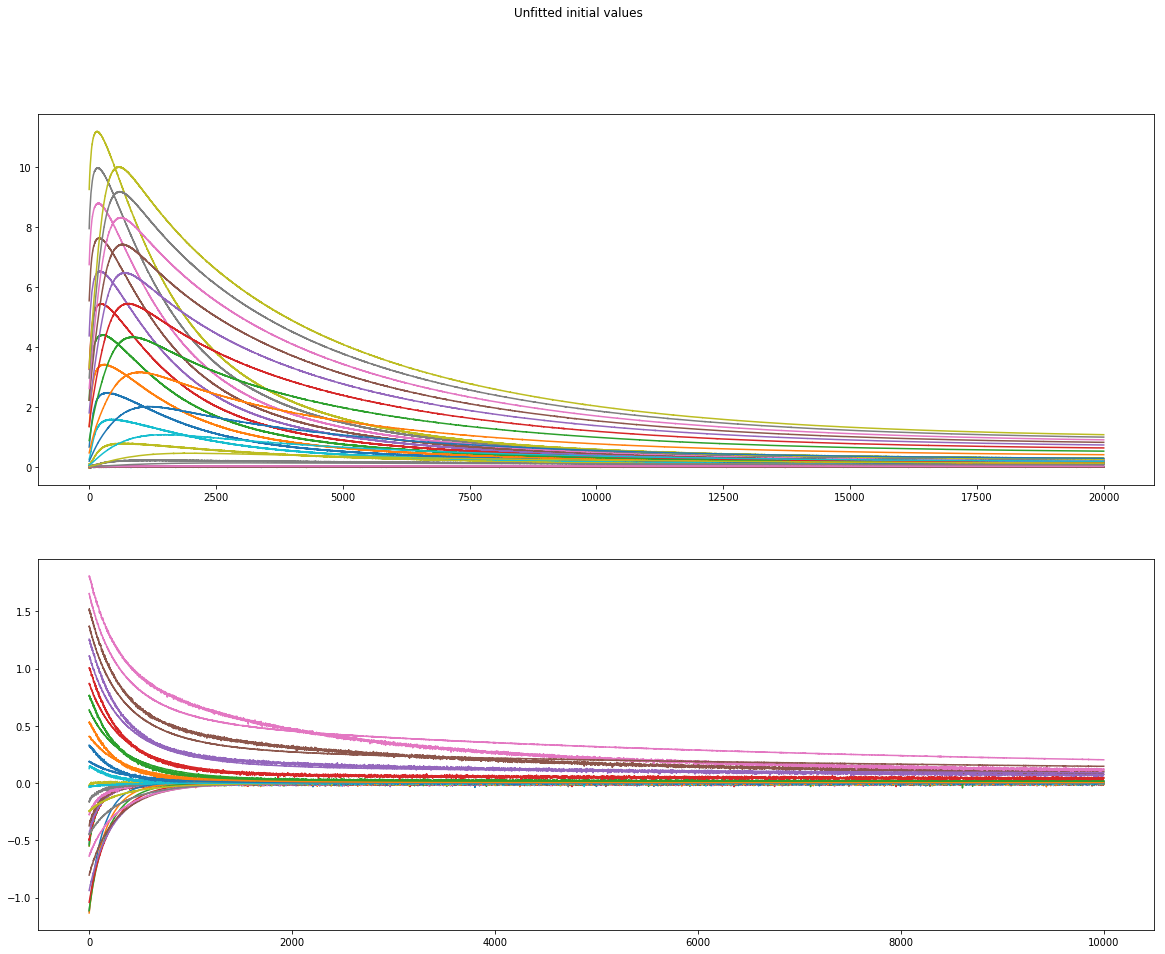

In [10]:
# Sanity check
states = get_states(ana[0], get_hold_voltages(ana[0]), Kv14.p_kinetic)
I1, I2 = get_currents(ana[0], states, (-74., 0.08, 0.03))
I1_target, I2_target = get_targets(ana[0])

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
for I in I1_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I1:
    plt.plot(I)

plt.subplot(2,1,2)
for I in I2_target:
    plt.plot(I)
plt.gca().set_prop_cycle(None)
for I in I2:
    plt.plot(I)
    
plt.suptitle("Unfitted initial values")

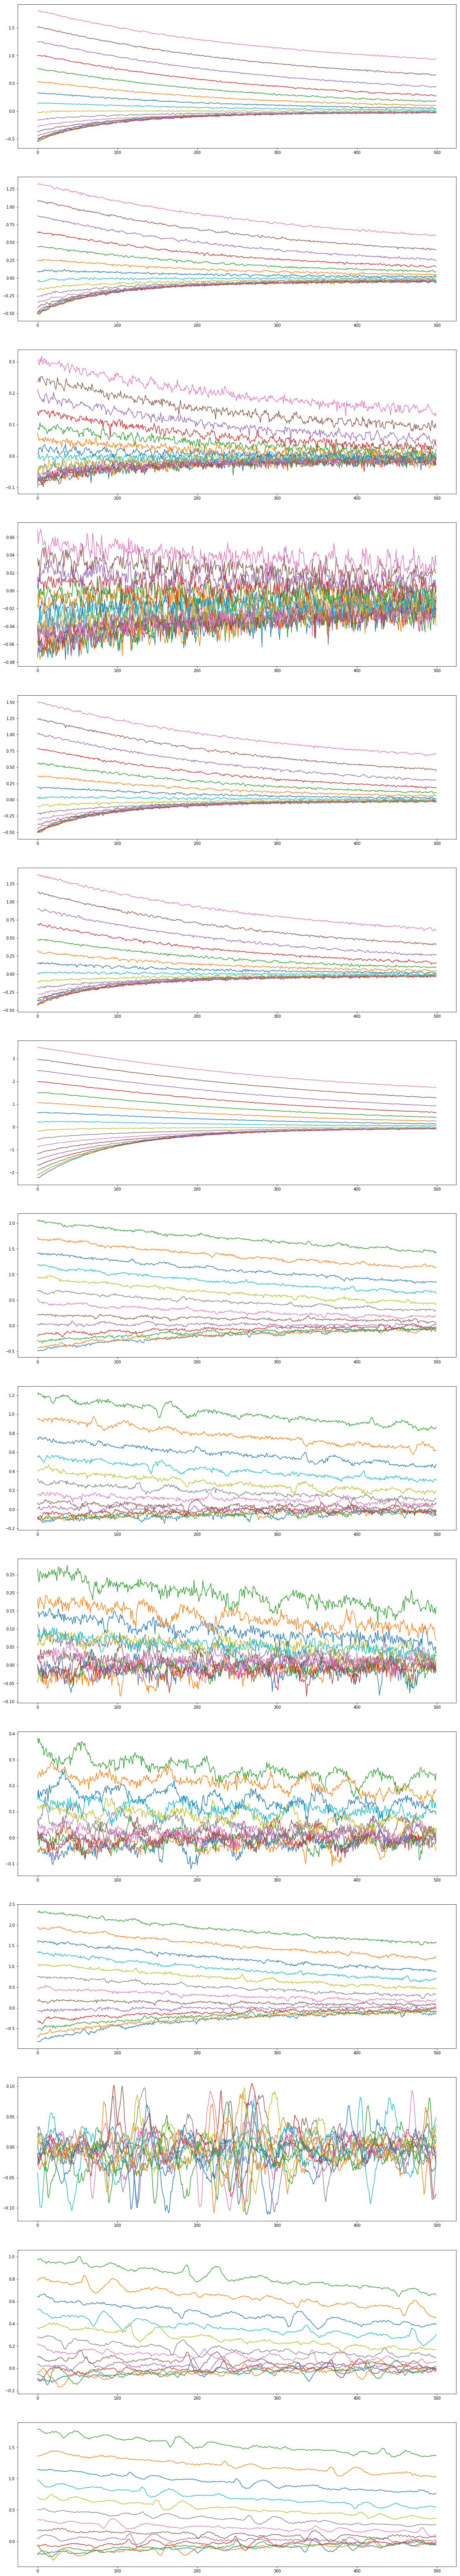

In [11]:
plt.figure(figsize=(20,8*len(ana)))
for i,a in enumerate(ana):
    I1_target, I2_target = get_targets(a)
    plt.subplot(len(ana),1, i+1)
    for I in I2_target:
        plt.plot(I[:500])

### Fitting just the conductances...

In [12]:
def g_residuals_fixed(p, a, states, targets):
    I1, I2 = get_currents(a, states, (a.params['E_K'], p[0], p[1]))
    
    # compare to target
    I1 -= targets[0]
    I2 -= targets[1]
    
    return np.concatenate((I1.ravel(), I2.ravel()))

In [13]:
gfits = [0] * len(ana)
for i,a in enumerate(ana):
    hold_voltages = get_hold_voltages(a)
    targets = get_targets(a)
    states = get_states(a, hold_voltages, Kv14.p_kinetic)
    
    start = time.time()
    gfits[i] = scipy.optimize.least_squares(g_residuals_fixed, (0.085, 0.036),
                                           args = (a, states, targets),
                                           bounds = ([0, 0],
                                                     [0.5, 0.5]))
    print i, time.time() - start, gfits[i].cost

0 27.4240849018 2066.8020363304913
1 31.4709479809 1534.6931426700667
2 37.9631319046 281.5640427653433
3 37.8503859043 323.3299499399961
4 27.2376511097 3238.225265164206
5 28.1156301498 2796.822766915081
6 17.234746933 21585.870796477764
7 22.1275579929 7410.818673040948
8 25.3293559551 3772.6536897145334
9 35.3476788998 227.499339885315
10 31.0942850113 372.18131990317494
11 21.5766289234 6577.762018263171
12 40.2924358845 301.92512551777463
13 27.4159150124 1715.3266817274784
14 18.3763709068 8920.39653404857


In [14]:
for a, gf in zip(ana, gfits):
    print a.paramsfile, a.params['E_K'], gf.x

/home/kernfel/Documents/Data/Oocytes/2017_12_06_0038.params -80.00196452234002 [0.01777759 0.09629944]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0058.params -75.92065930203212 [0.0143113  0.08721794]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0063.params -83.2748044120223 [0.00244635 0.02153677]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0068.params -60.42041134313921 [0.00360964 0.00303036]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0073.params -76.49513333111396 [0.02095702 0.08641713]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0078.params -77.99160092457537 [0.01578729 0.08603953]
/home/kernfel/Documents/Data/Oocytes/2017_12_06_0083.params -75.00704112252146 [0.12466407 0.10048618]
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0005.params -80.94421326149065 [0.02418404 0.11312559]
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02_01_0014.params -83.82235962341998 [0.01806156 0.08358407]
/home/kernfel/Documents/Data/Round3/2019_02_01/2019_02

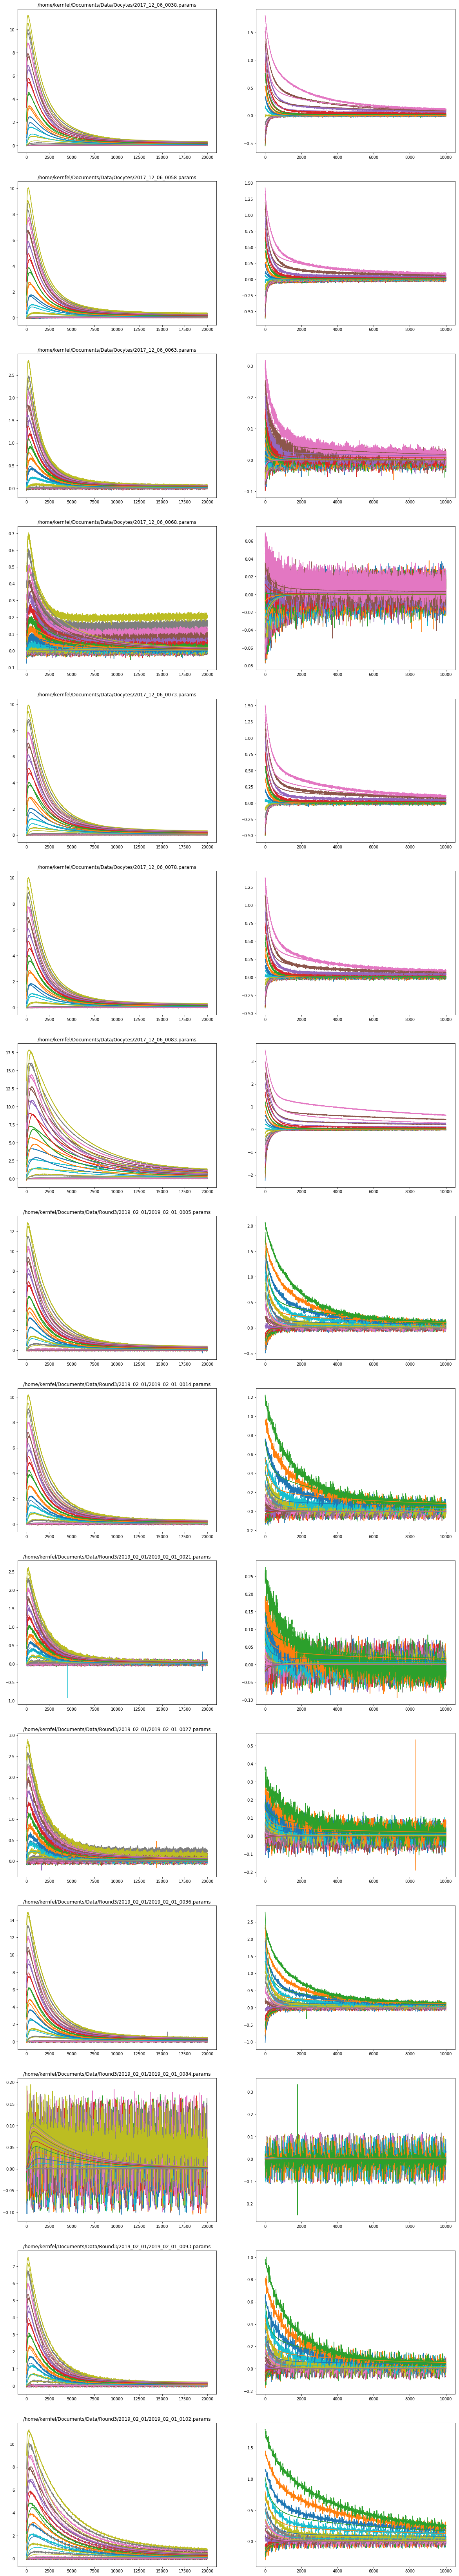

In [23]:
plt.figure(figsize=(20,8*len(ana)))

for i,a in enumerate(ana):
    states = get_states(a, get_hold_voltages(a), Kv14.p_kinetic)
    I1, I2 = get_currents(a, states, (a.params['E_K'], gfits[i].x[0], gfits[i].x[1]))
    I1_target, I2_target = get_targets(a)

    plt.subplot(len(ana),2, 2*i+1).set_title(a.paramsfile)
    for I in I1_target:
        plt.plot(I)
    plt.gca().set_prop_cycle(None)
    for I in I1:
        plt.plot(I)

    plt.subplot(len(ana),2, 2*i+2)
    for I in I2_target:
        plt.plot(I)
    plt.gca().set_prop_cycle(None)
    for I in I2:
        plt.plot(I)

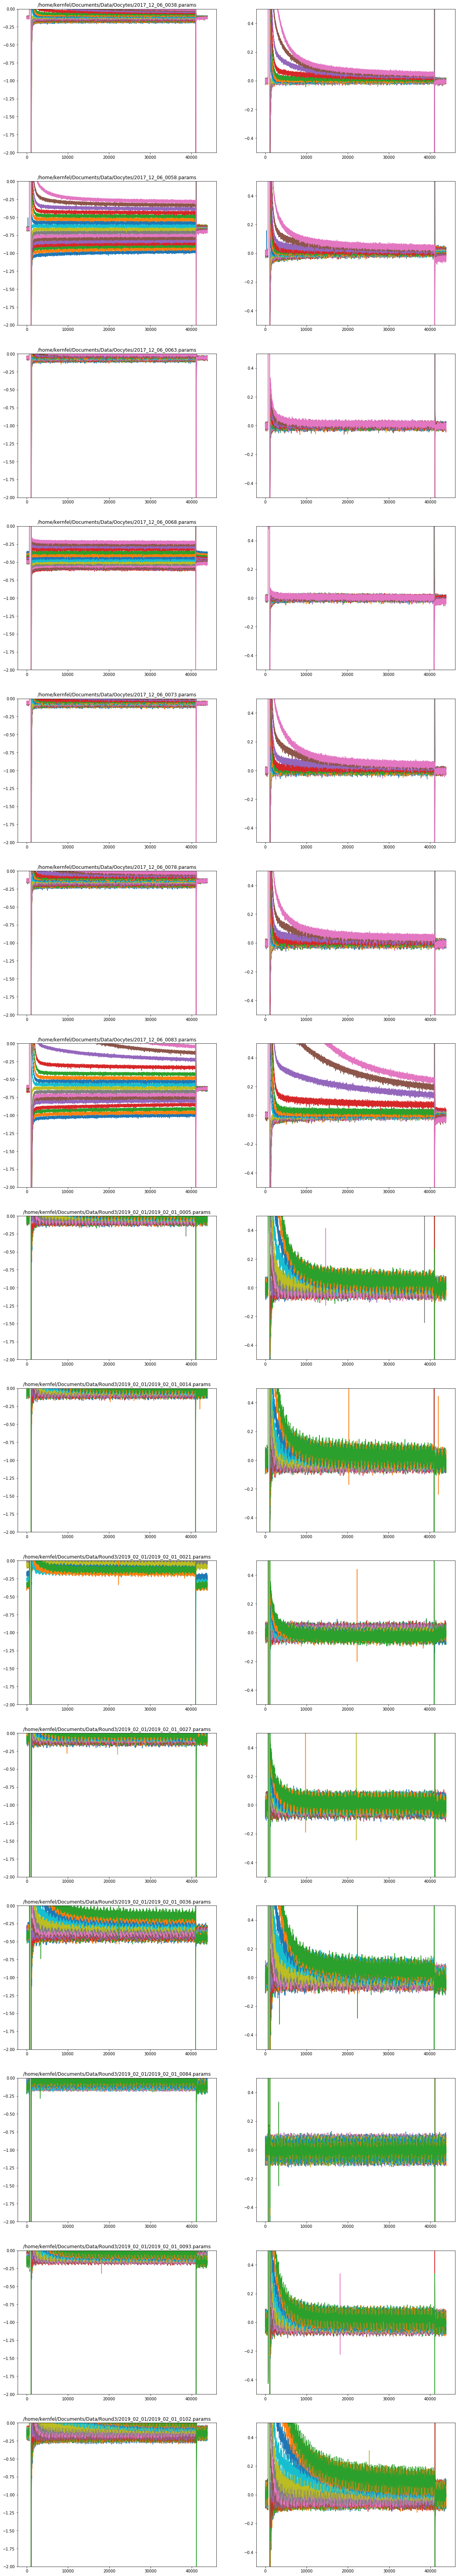

In [24]:
plt.figure(figsize=(20,8*len(ana)))
for i,a in enumerate(ana):
    gleak2 = ah.get_gleak(a.rec2, a.params['E_leak'], (0, Kv14.rec2_prepulse))
    I2_target = np.array([I - a.params['I_leak'](V, g)
                          for I, V, g in zip(a.rec2.current, a.rec2.voltage, gleak2)])
    plt.subplot(len(ana),2, 2*i+1).set_title(a.paramsfile)
    for I in a.rec2.current:
        plt.plot(I)
    plt.ylim((-2,0))
    
    plt.subplot(len(ana),2, 2*i+2)
    for I in I2_target:
        plt.plot(I)
    plt.ylim((-.5,.5))

In [17]:
for a, gf in zip(ana, gfits):
    a.params['gA_slow'] = gf.x[0]
    a.params['gA_fast'] = gf.x[1]
    a.write()